In [1]:
import pandas as pd

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('zitarice_klasterovanje.csv')
df.head()

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
0,100% Bran,70,4,1,130,10.0,5.0,6,280,25
1,100% Natural Bran,120,3,5,15,2.0,8.0,8,135,0
2,All-Bran,70,4,1,260,9.0,7.0,5,320,25
3,All-Bran with Extra Fiber,50,4,0,140,14.0,8.0,0,330,25
4,Almond Delight,110,2,2,200,1.0,14.0,8,-1,25


In [3]:
df.describe(include='all')

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
count,77,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
unique,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Raisin Nut Bran,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753
std,NaN,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523
min,NaN,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,NaN,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000
50%,NaN,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000
75%,NaN,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000


In [4]:
feature_names = df.columns.tolist()
X = df.drop('name', axis=1)

In [5]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X, columns=feature_names[1:])
#print(X)

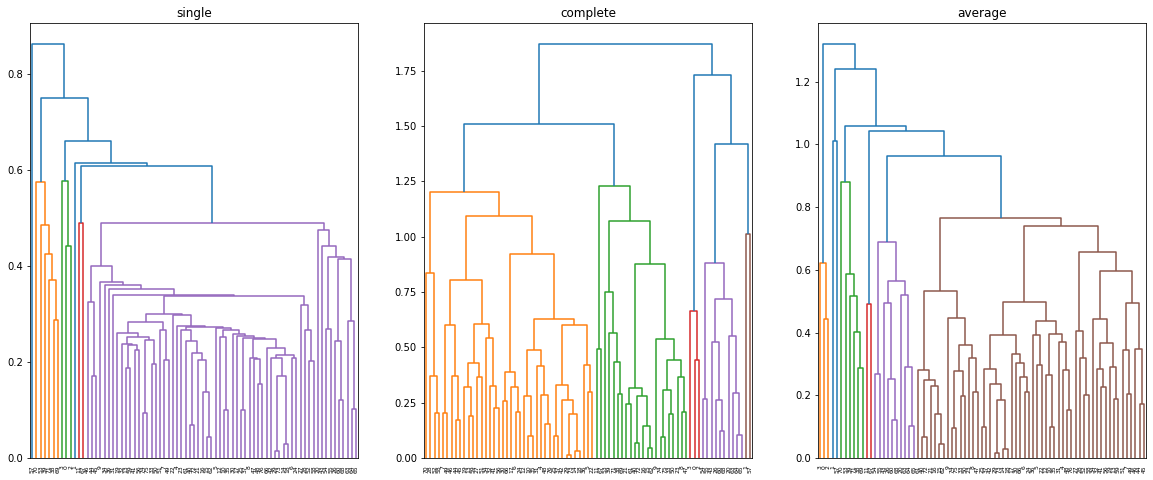

In [6]:
methods = ['single', 'complete', 'average']

fig = plt.figure(figsize=(20,8))
for i, method in enumerate(methods):
    Z = linkage(X, method=method)
    plt.subplot(1, 3, i + 1)
    plt.title(method)
    dendrogram(Z)
plt.show()
fig.savefig('dendrogrami.png')

In [61]:
# ne umem da procenim sta je najbolje. Neka bude npr za single vezu i za 5 klastera 
model = AgglomerativeClustering(n_clusters=5, linkage='single')
model.fit(X)

print(silhouette_score(X, model.labels_))

0.3537242790855975


In [62]:
pca = PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

xdf = pd.DataFrame(X, columns=['pca_0', 'pca_1'])
xdf['label'] = model.labels_
xdf

,pca_0,pca_1,label
0,0.681522,0.569637,2
1,0.200846,0.564792,1
2,0.560153,0.527152,2
3,1.077092,0.378022,3
4,-0.254910,-0.082344,1
...,...,...,...
72,-0.124789,-0.359002,1
73,-0.370851,-0.048879,1
74,0.138232,-0.113168,1
75,0.170881,-0.116011,1


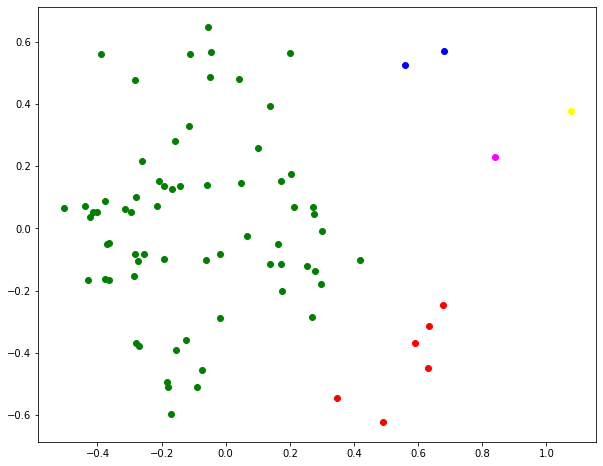

In [63]:
colors = ['red', 'green', 'blue', 'yellow', 'magenta']
fig = plt.figure(figsize=(10, 8))

for class_name in range(5):
    isntances = xdf[xdf['label'] == class_name]
    plt.scatter(isntances['pca_0'], isntances['pca_1'], color=colors[class_name])
    
plt.show()
fig.savefig('pca.png')